In [1]:
# Part I: Logistic Regression Model:

# A. Bring the dataset travel.csv into your environment, and use the head() function to 
# explore the variables: 

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

travel = pd.read_csv("travel.csv")
travel.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


B. Which of the variables here are categorical? Which are numerical?

Catergorical: CustomerID, ProdTaken, Type of Contact, CityTier, Occupation, Gender, ProductPitched, MaritalStatus, Passport, OwnCar, Designation

Numerical: Age, DurationOfPitch, NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, PitchSatisfactionScore, NumberOfChildrenVisiting, MonthlyIncome

In [2]:
# C. Use the value_counts() function from pandas to learn more about the outcome variable, 
# ProdTaken. Describe your findings -- what are the different outcome classes here, and how 
# common are each of them in the dataset?

travel['ProdTaken'].value_counts()

# There are two different outcome classes: 0 and 1. 0 means the person did not take the bundled
# travel deals to Maine. 1 means the person took the deal. In our dataset, There are 3968 
# people did not take the deal, and 920 people took the deal. 

0    3968
1     920
Name: ProdTaken, dtype: int64

In [3]:
# D. Compare the mean values of the variables in the dataset after grouping by ProdTaken. 
# For this step, you can just use the variables that are represented by numbers currently – you 
# don’t need to perform any transformations:

travel.groupby(['ProdTaken']).mean()

,CustomerID,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,,,,,,,,,,,,,
0,202405.107863,38.282092,1.615927,15.169325,2.901714,3.654286,3.542806,3.219531,0.233871,3.044355,0.622984,1.184190,23960.962835
1,202609.086957,34.770548,1.819565,16.873143,2.919565,3.941886,3.746171,3.308370,0.536957,3.223913,0.608696,1.200438,22172.827703


a. From the results you see here, choose any THREE independent variables from the dataset, and speculate about their likely impact on the result – do you think this variable will be strongly impactful? Why or why not?

Three independent variables: Age, Passport, MonthlyIncome

The three variables I chose will be strongly impactful in my opinion. The average age of people who took the deal is 3.5 years younger than those who did not take the deal. Young people are more familiar with the technology so they are more good at using search engines or coupon companies to get deals such as Honey. And younger people tend to have less money so they want to spend less money and that is why they could spend more time finding deals. People who took the deal have 30% more passports than people who did not take the deal. People who have passports travel more than people who do not have passports so they are more experienced. Therefore, they could know more ways to get deals or save money on the trip. People who took the deal have a lower monthly income. Rich people rarely use coupons!

In [4]:
# E. Examining correlations

# a. Build a correlation table to examine the correlations among your numeric independent 
# variables:

df = pd.DataFrame(travel)
df.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


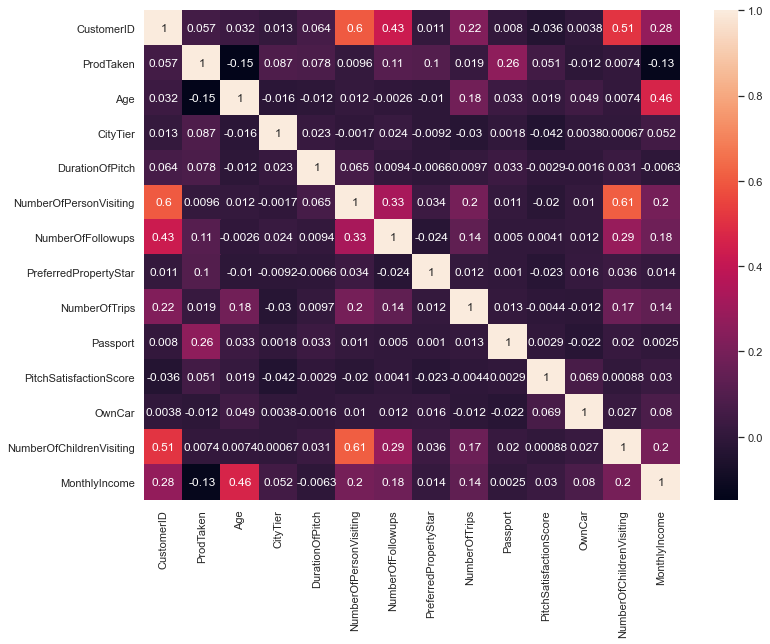

In [5]:
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(12, 9)})
sns.heatmap(corr_matrix, annot = True)
plt.show()

i. Are there any correlations here that are so high as to present a likely problem with multicollinearity? If so, remove one member of any highly-correlated pair. If not, keep rolling on.

No

In [6]:
# F. Handling missing values.

# a. Which columns contain missing values? How many of their values are missing?

travel.isnull().sum()

# 226 missing data in Age, 25 missing data in TypeofContact, 251 missing data in 
# DurationOfPitch, 45 misssing data in NumberOfFollowups, 26 missing data in 
# PreferredPropertyStar, 140 missing data in NumberOfTrips, 66 missing data in 
# NumberOfChildrenVisiting, and 233 missing data in MonthlyIncome. 

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
# b. To address the issue of missingness in this dataset, use any approach of your choice:

travel['Age'].fillna(value = travel['Age'].mean(), inplace = True)
travel['TypeofContact'].fillna(value = 'Self Inquiry', inplace = True)
travel['DurationOfPitch'].fillna(value = travel['DurationOfPitch'].mean(), inplace = True)
travel['NumberOfFollowups'].fillna(value = travel['NumberOfFollowups'].mean(), inplace = True)
travel['PreferredPropertyStar'].fillna(value = travel['PreferredPropertyStar'].mean(), 
                                       inplace = True)
travel['NumberOfTrips'].fillna(value = travel['NumberOfTrips'].mean(), inplace = True)
travel['NumberOfChildrenVisiting'].fillna(value = travel['NumberOfChildrenVisiting'].mean(), 
                                          inplace = True)
travel['MonthlyIncome'].fillna(value = travel['MonthlyIncome'].mean(), inplace = True)

In [8]:
travel.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

i. Explain your decision(s) in a couple of sentences.

For TypeofContact, I used Self Inquiry to fill in the missing value. Since there were only 25 missing values out of 4000+ data, I assume this was an error caused by individuals when they entered their information. For the rest of missing values, I used mean value since they are all numerical values. 

G. For your categorical input variables, which ones require further handling in order to be dummified for use in a model? Which ones are okay in their current format?

Need to be dummified: Type of Contact, CityTier, Occupation, Gender, ProductPitched, MaritalStatus, Designation

In [9]:
travel2 = travel.drop(columns = 'CustomerID')
travel2.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
# a. For any variables that need further treatment, dummify them, being sure to drop one level
# as you do:

travel3 = pd.get_dummies(travel2, drop_first = True, 
                     columns = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 
                                'ProductPitched', 'MaritalStatus', 'Designation'])

In [11]:
pd.set_option('display.max_columns', None)
travel3.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Self Inquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1,0,49.000000,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,1,37.000000,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,33.000000,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,37.622265,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [12]:
# H. Create a data partition. For your random_state value, use a number based on either your 
# work, home, or school address, or just a number that you like (For example, I live at 200 
# Market St, I work at 1010 Commonwealth Avenue, and my lucky number is 80, so I could use 
# either 200, 1010, or 80). Assign 40% of your rows to your test set, and 60% to your 
# training set:

X = travel3[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 
             'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
             'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 
             'TypeofContact_Self Enquiry', 'TypeofContact_Self Inquiry', 'CityTier_2', 
             'CityTier_3', 'Occupation_Large Business', 'Occupation_Salaried', 
             'Occupation_Small Business', 'Gender_Female', 'Gender_Male', 
             'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 
             'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 
             'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 
             'Designation_Senior Manager', 'Designation_VP']]  
y = travel3['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 911)

In [13]:
print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(2932, 31) (1956, 31) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(2932,) (1956,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


a. How did you pick your seed value?

I picked this seed value because my birthday is 09/11.

In [14]:
# Iteration #1

# I. Build a logistic regression model using statsmodels, with the outcome variable ProdTaken.
# Use the rest of the variables from the dataset as inputs (except CustomerID). Remember to use
# only your training data to build this model:

logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()
print(result.summary())

         Current function value: 0.357836
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2904
Method:                           MLE   Df Model:                           27
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2594
Time:                        20:45:26   Log-Likelihood:                -1049.2
converged:                      False   LL-Null:                       -1416.7
Covariance Type:            nonrobust   LLR p-value:                1.637e-137
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0286      0.007     -3.908      0.000      -0.043      -0.014
DurationOfPitc

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# J. Show the summary of your model with log_reg.summary(). (Note: If you named your model 
# something else, e.g. mymodel, you can just use mymodel.summary() here):

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2904
Method:                           MLE   Df Model:                           27
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2594
Time:                        20:45:26   Log-Likelihood:                -1049.2
converged:                      False   LL-Null:                       -1416.7
Covariance Type:            nonrobust   LLR p-value:                1.637e-137
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0286      0.007     -3.908      0.000      -0.043      -0.014
DurationOfPitch                 0.0358      0.007      5.255      0.000       0.022       0.049
NumberOfPersonVisiting         -0.1737      0.103     -1.685      0.092      -0.376       0.028
NumberOfFollowups               0.3871      0.064      6.052      0.000       0.262       0.512
PreferredPropertyStar           0.3425      0.068      5.039      0.000       0.209       0.476
NumberOfTrips                   0.1081      0.031      3.507      0.000       0.048       0.169
Passport                        1.6990      0.117     14.513      0.000       1.470       1.928
PitchSatisfactionScore          0.1455      0.042      3.486      0.000       0.064       0.227
OwnCar                          0.0704      0.115      0.611      0.541      -0.156       0.297
NumberOfChildrenVisiting       -0.0565      0.085     -0.662      0.508      -0.224       0.111
MonthlyIncome               -1.368e-05   1.94e-05     -0.704      0.481   -5.17e-05    2.44e-05
TypeofContact_Self Enquiry     -0.3715      0.120     -3.102      0.002      -0.606      -0.137
TypeofContact_Self Inquiry      0.4565      0.880      0.519      0.604      -1.268       2.181
CityTier_2                      0.7133      0.257      2.779      0.005       0.210       1.216
CityTier_3                      1.1590      0.133      8.743      0.000       0.899       1.419
Occupation_Large Business     -16.1812   6873.111     -0.002      0.998   -1.35e+04    1.35e+04
Occupation_Salaried           -16.8631   6873.111     -0.002      0.998   -1.35e+04    1.35e+04
Occupation_Small Business     -16.7713   6873.111     -0.002      0.998   -1.35e+04    1.35e+04
Gender_Female                   0.2446      0.382      0.640      0.522      -0.505       0.994
Gender_Male                     0.5427      0.373      1.454      0.146      -0.189       1.274
ProductPitched_Deluxe           5.2333   1.12e+08   4.67e-08      1.000    -2.2e+08     2.2e+08
ProductPitched_King             5.5754        nan        nan        nan         nan         nan
ProductPitched_Standard         5.5995        nan        nan        nan         nan         nan
ProductPitched_Super Deluxe    10.3271   6873.111      0.002      0.999   -1.35e+04    1.35e+04
MaritalStatus_Married           0.1024      0.164      0.624      0.533      -0.219       0.424
MaritalStatus_Single            1.3001      0.180      7.206      0.000       0.946       1.654
MaritalStatus_Unmarried         0.9348      0.209      4.466      0.000       0.525       1.345
Designation_Executive          12.0372   6873.111      0.002      0.999   -1.35e+04    1.35e+04
Designation_Manager             5.2333   1.12e+08   4.67e-08      1.000    -2.2e+08     2.2e+08
Designation_Senior Manager      5.5995      2.322      2.411      0.016       1.048      10.151
Designation_VP                  5.5754        nan        nan        nan  

a. Which of your categorical variables are showing ‘nan’ results for standard errors?


ProductPitched_Deluxe, ProductPitched_Standard, Designation_Manager, and Designation_Senior Manager are showing 'nan'.

In [16]:
# Iteration #2

# K. Now, build another model. Again, use statsmodels, and again, use your training set 
# variables. However, this time, completely remove any categorical variable that you 
# identified in the previous step as having any nan value in your results table. If one or 
# more levels of that variable showed those nans, just remove the entire category:

X = travel3[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 
             'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
             'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 
             'TypeofContact_Self Enquiry', 'TypeofContact_Self Inquiry', 'CityTier_2', 
             'CityTier_3', 'Occupation_Large Business', 'Occupation_Salaried', 
             'Occupation_Small Business', 'Gender_Female', 'Gender_Male', 
             'ProductPitched_King', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 
             'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive',
             'Designation_VP']]  
y = travel3['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 911)

logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.360104
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2906
Method:                           MLE   Df Model:                           25
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2548
Time:                        20:45:26   Log-Likelihood:                -1055.8
converged:                       True   LL-Null:                       -1416.7
Covariance Type:            nonrobust   LLR p-value:                3.473e-136
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0274      0.007     -3.768      0.000   

In [17]:
# a. Show the results of this 2nd model with log_reg.summary():

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2906
Method:                           MLE   Df Model:                           25
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2548
Time:                        20:45:26   Log-Likelihood:                -1055.8
converged:                       True   LL-Null:                       -1416.7
Covariance Type:            nonrobust   LLR p-value:                3.473e-136
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0274      0.007     -3.768      0.000      -0.042      -0.013
DurationOfPitch                 0.0359      0.007      5.285      0.000       0.023       0.049
NumberOfPersonVisiting         -0.1698      0.102     -1.658      0.097      -0.371       0.031
NumberOfFollowups               0.3749      0.063      5.926      0.000       0.251       0.499
PreferredPropertyStar           0.3495      0.068      5.161      0.000       0.217       0.482
NumberOfTrips                   0.1005      0.031      3.290      0.001       0.041       0.160
Passport                        1.6842      0.116     14.477      0.000       1.456       1.912
PitchSatisfactionScore          0.1464      0.042      3.519      0.000       0.065       0.228
OwnCar                          0.0696      0.115      0.606      0.545      -0.156       0.295
NumberOfChildrenVisiting       -0.0748      0.085     -0.881      0.378      -0.241       0.092
MonthlyIncome                6.719e-06   1.66e-05      0.405      0.686   -2.58e-05    3.93e-05
TypeofContact_Self Enquiry     -0.3725      0.119     -3.119      0.002      -0.607      -0.138
TypeofContact_Self Inquiry      0.3212      0.866      0.371      0.711      -1.376       2.019
CityTier_2                      0.6990      0.255      2.746      0.006       0.200       1.198
CityTier_3                      1.1179      0.131      8.513      0.000       0.861       1.375
Occupation_Large Business      -5.8191      0.721     -8.069      0.000      -7.233      -4.406
Occupation_Salaried            -6.5078      0.713     -9.124      0.000      -7.906      -5.110
Occupation_Small Business      -6.4216      0.713     -9.009      0.000      -7.819      -5.025
Gender_Female                   0.1385      0.380      0.365      0.715      -0.606       0.883
Gender_Male                     0.4336      0.371      1.169      0.242      -0.293       1.161
ProductPitched_King             0.1055   1.06e+07   9.95e-09      1.000   -2.08e+07    2.08e+07
ProductPitched_Super Deluxe    -0.5386      0.349     -1.542      0.123      -1.223       0.146
MaritalStatus_Married           0.1050      0.164      0.641      0.522      -0.216       0.426
MaritalStatus_Single            1.2784      0.180      7.111      0.000       0.926       1.631
MaritalStatus_Unmarried         0.9224      0.209      4.420      0.000       0.513       1.331
Designation_Executive           1.4150      0.146      9.700      0.000       1.129       1.701
Designation_VP                  0.1055   1.06e+07   9.95e-09      1.000   -2.08e+07    2.08e+07
===============================================================================================
"""

b. Which of your numeric input variables are showing high p-values?

MonthlyIncome, NumberOfChildrenVisiting

c. Which of your categorical input variables are showing high p-values for
ALL of their levels?

OwnCar, TypeofContact_Self Inquiry, Gender_Female, Gender_Male, ProductPitched_King, ProductPitched_Super Deluxe, MaritalStatus_Married, Designation_VP

In [18]:
# Iteration #3

# L. Now, build yet another model. Again use statsmodels, and again, use your training set 
# only. Start with the variables you used in Iteration #2 but drop the ones you identified in 
# the previous step, for parts (b) and (c):

X = travel3[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 
             'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
             'TypeofContact_Self Enquiry', 'CityTier_2', 'CityTier_3', 
             'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business',  
             'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive']]  
y = travel3['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 911)

logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.362247
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2915
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2503
Time:                        20:45:27   Log-Likelihood:                -1062.1
converged:                       True   LL-Null:                       -1416.7
Covariance Type:            nonrobust   LLR p-value:                1.368e-140
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0283      0.007     -4.138      0.000      

In [19]:
# a. Show the results of this 3rd model with log_reg.summary():

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProdTaken   No. Observations:                 2932
Model:                          Logit   Df Residuals:                     2915
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.2503
Time:                        20:45:27   Log-Likelihood:                -1062.1
converged:                       True   LL-Null:                       -1416.7
Covariance Type:            nonrobust   LLR p-value:                1.368e-140
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0283      0.007     -4.138      0.000      -0.042      -0.015
DurationOfPitch                0.0343      0.007      5.149      0.000       0.021       0.047
NumberOfPersonVisiting        -0.2105      0.085     -2.485      0.013      -0.376      -0.044
NumberOfFollowups              0.3733      0.062      6.055      0.000       0.252       0.494
PreferredPropertyStar          0.3495      0.067      5.187      0.000       0.217       0.482
NumberOfTrips                  0.1000      0.030      3.293      0.001       0.040       0.160
Passport                       1.6623      0.115     14.411      0.000       1.436       1.888
PitchSatisfactionScore         0.1447      0.041      3.492      0.000       0.064       0.226
TypeofContact_Self Enquiry    -0.3621      0.118     -3.061      0.002      -0.594      -0.130
CityTier_2                     0.6988      0.254      2.752      0.006       0.201       1.197
CityTier_3                     1.0907      0.130      8.401      0.000       0.836       1.345
Occupation_Large Business     -5.1339      0.539     -9.520      0.000      -6.191      -4.077
Occupation_Salaried           -5.8126      0.526    -11.057      0.000      -6.843      -4.782
Occupation_Small Business     -5.7220      0.529    -10.824      0.000      -6.758      -4.686
MaritalStatus_Single           1.1706      0.133      8.809      0.000       0.910       1.431
MaritalStatus_Unmarried        0.8210      0.160      5.121      0.000       0.507       1.135
Designation_Executive          1.4098      0.132     10.656      0.000       1.151       1.669
==============================================================================================
"""

In [20]:
# M. Using scikit-learn, build another version of Model Iteration #3. You will use this 
# version of the model for all remaining steps:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# N. Assess the performance of your model against the test set. Build a confusion matrix, 
# and answer the following questions about your model. You can use Python functions to answer
# any of these questions or you can use your confusion matrix to determine the answers in a 
# slightly more manual way. The ‘positive’ class in this model is represented by the “1” 
# outcome:

predictions1 = logmodel.predict(X_train)
accuracy_score(y_train, predictions1)

0.8454979536152797

In [22]:
predictions2 = logmodel.predict(X_test)
accuracy_score(y_test, predictions2)

0.8333333333333334

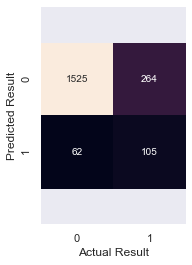

In [23]:
%matplotlib inline

mat = confusion_matrix(predictions2, y_test)
sns.heatmap(mat, square = True, annot = True, fmt = 'g', cbar = False)
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [24]:
# a. What is your model’s accuracy rate? 

total_logmodel_matrix = sum(sum(mat))

accuracy_logmodel = (mat[1, 1] + mat[0, 0]) / total_logmodel_matrix
print('The logistic regression model has an accuracy of:', accuracy_logmodel)

The logistic regression model has an accuracy of: 0.8333333333333334


In [25]:
# b. What is your model’s sensitivity rate? 

sensitivity_logmodel = mat[1, 1] / (mat[1, 1] + mat[0, 1])
print('The logistic regression model has a sensitivity of: ', sensitivity_logmodel)

The logistic regression model has a sensitivity of:  0.2845528455284553


In [26]:
# c. What is your model’s specificity rate?

specificity_logmodel = mat[0, 0] / (mat[0, 0] + mat[1, 0])
print('The logistic regression model has a specificity of: ', specificity_logmodel)

The logistic regression model has a specificity of:  0.9609325771896661


In [27]:
# d. What is your model’s precision? 0.85/0.64
# e. What is your model’s balanced accuracy? 0.83

print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1587
           1       0.63      0.28      0.39       369

    accuracy                           0.83      1956
   macro avg       0.74      0.62      0.65      1956
weighted avg       0.81      0.83      0.81      1956



In [28]:
# O. Compare your model’s accuracy against the training set vs. accuracy against the test 
# set (just use accuracy only for this): 

predictions1 = logmodel.predict(X_train)
accuracy_score(y_train, predictions1)

0.8454979536152797

In [29]:
predictions2 = logmodel.predict(X_test)
accuracy_score(y_test, predictions2)

0.8333333333333334

a. What is the purpose of comparing those two values?

To test if our prediction is correct. Not overfitted. 

b. In this case, what does the comparison of those values suggest about the
model that you have built?

The accuracy difference is 0.01 which means the model is good!

In [30]:
# P. Make up a household. Assign this household a value for each predictor variable in this 
# model, and store the results in a new dataframe. Now, put your household through this model: 

Tiange = pd.DataFrame([{'Age': 24, 'DurationOfPitch': 8.0, 'NumberOfPersonVisiting': 1, 
                        'NumberOfFollowups': 2.0, 'PreferredPropertyStar': 3.0, 
                        'NumberOfTrips': 1.0, 'Passport': 1, 'PitchSatisfactionScore': 2, 
                        'TypeofContact_Self Enquiry': 1, 'CityTier_2': 0, 'CityTier_3': 1, 
                        'Occupation_Large Business': 0, 'Occupation_Salaried': 1, 
                        'Occupation_Small Business': 0,  'MaritalStatus_Single': 1, 
                        'MaritalStatus_Unmarried': 0, 'Designation_Executive': 0}])
Tiange

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive
0,24,8.0,1,2.0,3.0,1.0,1,2,1,0,1,0,1,0,1,0,0


In [31]:
newprediction = logmodel.predict(Tiange)
newprediction

array([0])

a. What did your model predict -- will this household take the return offer?

No the household will not take the return offer.

In [32]:
# b. According to your model, what is the probability that the household will accept the offer?

logmodel.predict_proba(Tiange).round(100) 

array([[0.55364012, 0.44635988]])

According to my model, there is a 38.41% chance, the household will accept the offer

Q. When using a logistic regression model to make predictions, why is it important to only use values within the range of the dataset used to build the model?

When using out of range data, the probability will become very close to one, and our prediction will become meaningless. 

In [33]:
# a. Make a new dataframe, but this time, for the numeric predictor variables, select some 
# numbers that are outside the range of the dataset -- do not use a 400+ year-old vampire 
# named “Mary.” Use your model to make a prediction for this new dataframe. What do you 
# notice about the result? (To answer this, don’t simply state the predicted outcome, 
# but also write 1-2 sentences of explanation for what you see).

Qiao = pd.DataFrame([{'Age': 75, 'DurationOfPitch': 150.0, 'NumberOfPersonVisiting': 1, 
                        'NumberOfFollowups': 2.0, 'PreferredPropertyStar': 6.0, 
                        'NumberOfTrips': 1.0, 'Passport': 1, 'PitchSatisfactionScore': 2, 
                        'TypeofContact_Self Enquiry': 1, 'CityTier_2': 0, 'CityTier_3': 1, 
                        'Occupation_Large Business': 0, 'Occupation_Salaried': 1, 
                        'Occupation_Small Business': 0,  'MaritalStatus_Single': 1, 
                        'MaritalStatus_Unmarried': 0, 'Designation_Executive': 0}])
Qiao

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive
0,75,150.0,1,2.0,6.0,1.0,1,2,1,0,1,0,1,0,1,0,0


In [34]:
X.describe()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,37.622265,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.704583,0.040507,0.306874,0.088789,0.484452,0.426350,0.187398,0.139525,0.376841
std,9.098418,8.297971,0.724891,0.997882,0.795883,1.822342,0.454232,1.365792,0.456277,0.197166,0.461244,0.284468,0.499809,0.494597,0.390270,0.346529,0.484644
min,18.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
logmodel.predict_proba(Qiao).round(100) 

array([[0.06801643, 0.93198357]])

As we can see from the X dataframe, the max age is 61, the max duration of pitch is 127, and the max of hotel star is 5. I used a household who is 75 years old, the duration of pitch is 150, and prefer a 6 satr hotel. These are out of range data. As a result, the probability is very close to one. The prediction is meaningless. 

In [36]:
# Part II: Random Forest Model

# R. Read the dataset back into Python. Dummify the categorical inputs again, but this time,
# don’t drop any levels:

# S. To handle the missing values, use the same process that you used in the previous section:

# T. Re-partition the data, using the same seed value that you used in the previous part of 
# this assignment:

travel_RF = pd.read_csv("travel.csv")

travel_RF['Age'].fillna(value = travel_RF['Age'].mean(), inplace = True)
travel_RF['TypeofContact'].fillna(value = 'Self Inquiry', inplace = True)
travel_RF['DurationOfPitch'].fillna(value = travel_RF['DurationOfPitch'].mean(), inplace = True)
travel_RF['NumberOfFollowups'].fillna(value = travel_RF['NumberOfFollowups'].mean(), 
                                      inplace = True)
travel_RF['PreferredPropertyStar'].fillna(value = travel_RF['PreferredPropertyStar'].mean(), 
                                       inplace = True)
travel_RF['NumberOfTrips'].fillna(value = travel_RF['NumberOfTrips'].mean(), inplace = True)
travel_RF['NumberOfChildrenVisiting'].fillna(value = travel_RF['NumberOfChildrenVisiting'].mean(), 
                                          inplace = True)
travel_RF['MonthlyIncome'].fillna(value = travel_RF['MonthlyIncome'].mean(), inplace = True)

travel_RF2 = travel_RF.drop(columns = 'CustomerID')

travel_RF3 = pd.get_dummies(travel_RF2, drop_first = True, 
                     columns = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 
                                'ProductPitched', 'MaritalStatus', 'Designation'])

X = travel_RF3[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 
                'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
                'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 
                'TypeofContact_Self Enquiry', 'TypeofContact_Self Inquiry', 'CityTier_2', 
                'CityTier_3', 'Occupation_Large Business', 'Occupation_Salaried', 
                'Occupation_Small Business', 'Gender_Female', 'Gender_Male', 
                'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 
                'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 
                'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 
                'Designation_Senior Manager', 'Designation_VP']]  
y = travel_RF3['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 911)

In [37]:
# U. Build a random forest model in Python with your training set. Use the same input variables, 
# and same output variable, as you used in the first logistic regression model (the only 
# difference here is that the categories should not have any levels dropped). Use GridSearchCV 
# to help you determine the best hyperparameter settings for your model:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

param_grid = {'n_estimators': [50, 100, 150], 
              'max_depth': [4, 8, 10, 12], 
              'max_features': [10, 20, 30], # use max feature -1
              'min_samples_leaf': [6, 10, 14], }

In [38]:
CV_rfc = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 6, 'n_estimators': 150}


In [39]:
clf = RandomForestClassifier(n_estimators = 150, max_depth = 12, 
                           max_features = 30, min_samples_leaf = 6, random_state = 911)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=30, min_samples_leaf=6,
                       n_estimators=150, random_state=911)

In [40]:
# V. How did your random forest model rank the variables in order of importance, from highest to 
# lowest? 

# By using GridSearchCV to help me determine the best hyperparameter settings for me model, this is
# how my random forest model rank the variables in order of importance, from highest to lowest:

feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by = 'feature importance', ascending = False)
feature_imp_df

,feature importance,feature
0,0.157848,Age
1,0.125536,DurationOfPitch
6,0.120301,Passport
27,0.100374,Designation_Executive
10,0.091989,MonthlyIncome
7,0.055412,PitchSatisfactionScore
5,0.049377,NumberOfTrips
14,0.041003,CityTier_3
3,0.039429,NumberOfFollowups
25,0.032605,MaritalStatus_Single


For a random forest model, how can you interpret feature importance?

The average over all trees in the forest is the measure of the feature importance.

Reference
Płoński, P. (2020, June 29). Random Forest feature importance computed in 3 ways with python. 
MLJAR. Retrieved October 25, 2022, from https://mljar.com/blog/feature-importance-in-random-forest/ 

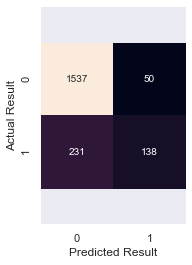

In [41]:
# W. Assess the performance of your model against the test set. Build a confusion matrix to 
# dothis. YoucanusePythonfunctionstoansweranyofthesequestionsoryoucanuse your confusion matrix to 
# determine the answers in a slightly more manual way. The ‘positive’ class in this model is 
# represented by the “1” outcome:

predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt = 'g', square = True, annot = True, cbar = False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [42]:
# a. What is your model’s accuracy rate? 

total_rf_matrix = sum(sum(mat))

accuracy_rf = (mat[1, 1] + mat[0, 0]) / total_rf_matrix
print('The random forest model has an accuracy of:', accuracy_rf)

The random forest model has an accuracy of: 0.8563394683026585


In [43]:
# b. What is your model’s sensitivity rate? 

sensitivity_rf = mat[1, 1] / (mat[1, 1] + mat[0, 1])
print('The random forest model has a sensitivity of: ', sensitivity_rf)

The random forest model has a sensitivity of:  0.7340425531914894


In [44]:
# c. What is your model’s specificity rate?

specificity_rf = mat[0, 0] / (mat[0, 0] + mat[1, 0])
print('The random forest model has a specificity of: ', specificity_rf)

The random forest model has a specificity of:  0.869343891402715


In [45]:
# d. What is your model’s precision? 0.87/0.73
# e. What is your model’s balanced accuracy? 0.86

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1587
           1       0.73      0.37      0.50       369

    accuracy                           0.86      1956
   macro avg       0.80      0.67      0.71      1956
weighted avg       0.84      0.86      0.84      1956



In [46]:
# X. Compare your model’s accuracy against the training set vs. your model’s accuracy against 
# the test set. How different were these results?

predictions1 = clf.predict(X_train)
accuracy_score(y_train, predictions1)

0.9283765347885402

In [47]:
predictions2 = clf.predict(X_test)
accuracy_score(y_test, predictions2)

0.8563394683026585

In [48]:
(0.9283765347885402 - 0.8563394683026585) * 100

7.20370664858817

By comparing the accuracy against the training set vs. the test set, the training set was 7.20% higher than than the test set. 

In [49]:
X.describe()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Self Inquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,37.622265,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491,0.704583,0.005115,0.040507,0.306874,0.088789,0.484452,0.426350,0.371727,0.596563,0.354337,0.047054,0.151800,0.069967,0.478723,0.187398,0.139525,0.376841,0.354337,0.151800,0.047054
std,9.098418,8.297971,0.724891,0.997882,0.795883,1.822342,0.454232,1.365792,0.485363,0.852049,5250.862747,0.456277,0.071340,0.197166,0.461244,0.284468,0.499809,0.494597,0.483315,0.490637,0.478361,0.211776,0.358864,0.255118,0.499598,0.390270,0.346529,0.484644,0.478361,0.358864,0.211776
min,18.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22655.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Y. Use the predict() function with your model to classify the person who you invented in the 
# previous section. Does the model think this household will accept the return offer?

Tiange = pd.DataFrame([{'Age': 24, 'DurationOfPitch': 8.0, 'NumberOfPersonVisiting': 1, 
                        'NumberOfFollowups': 2.0, 'PreferredPropertyStar': 3.0, 
                        'NumberOfTrips': 1.0, 'Passport': 1, 'PitchSatisfactionScore': 2, 
                        'TypeofContact_Self Enquiry': 1, 'CityTier_2': 0, 'CityTier_3': 1, 
                        'Occupation_Large Business': 0, 'Occupation_Salaried': 1, 
                        'Occupation_Small Business': 0,  'MaritalStatus_Single': 1, 
                        'MaritalStatus_Unmarried': 0, 'Designation_Executive': 0, 
                        'OwnCar': 1, 'NumberOfChildrenVisiting': 0, 'MonthlyIncome': 10000, 
                        'TypeofContact_Self Inquiry': 0, 'Gender_Female': 0, 'Gender_Male': 1, 
                        'ProductPitched_Deluxe': 0, 'ProductPitched_King': 0, 
                        'ProductPitched_Standard': 0, 'ProductPitched_Super Deluxe': 0,
                        'MaritalStatus_Married': 0, 'Designation_Manager': 0, 
                        'Designation_Senior Manager': 0, 'Designation_VP': 0}])

newprediction = clf.predict(Tiange)
newprediction

# The model think this household will NOT accept the return offer.

array([0])

Z. For this question, no Python code is required -- just use a Markdown cell to answer. Write a 3-5 sentence paragraph that speculates about why Lobster Land might care about being able to use this model. There is not a single “correct” answer to this question. Be thoughtful and be creative, and consider the impact of being able to predict whether a specific household will accept a particular offer and/or how likely they are to accept it. You can mention a marketing angle, an operations angle, or anything else that comes to mind.

Lobster Land will care about being able to use this model because it can bring profits. Since the time is fixed, we want to reach as many customers as possible in a fixed time. Spending time on a customer with a low probability of taking this offer is a waste of time. By applying this model, we can only talk to customers with a high probability to take this offer. Therefore we have a higher chance of making more money in a fixed period. 